In [1]:
#project:p10
#submitter:lqin33
#partner:mjiao5

In [2]:
import requests, os, math
import numpy as np
import pandas as pd
from pandas import DataFrame
from math import sin,cos,asin,sqrt

def download(filename, url):
    if os.path.exists(filename):
        print(str(filename) + " already exists!")
    else:
        r = requests.get(url)
        r.raise_for_status()
        data = r.text
        f = open(filename, "w", encoding="utf-8")
        f.write(data)
        f.close()
    return (str(filename) + " created!")

In [3]:
#draft:
# sa_to_all_distance['Chile'].tolist()
# list(filter(no_nan, sa_to_all_distance['Chile'].tolist()))
# #Q13: What is the least central country in South America?
# sa_to_all_distance = find_group_distance(list(countries['country']),select_countries('continent','South America'))
# new_sa_to_all_distance = sa_to_all_distance.copy(deep=True)
# # new_sa_to_all_distance['Sum'] = new_sa_to_all_distance.apply(lambda x: new_avg(x))
# # new_sa_to_all_distance['Sum'].sort_values(ascending = True).index[0]
# new_sa_to_all_distance.loc['Avg'] = new_sa_to_all_distance.apply(lambda x: new_avg(x))
# new_sa_to_all_distance.loc['Avg'].sort_values(ascending = False).index[0]

In [4]:
download('countries.json', 'https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json')

countries.json already exists!


'countries.json created!'

In [5]:
countries = pd.read_json('countries.json')

In [6]:
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2381740,17.14,0.04,Africa,Algeria,4.61,6000,31.00,"70,0",-0.39,"78,1",32930091,NORTHERN AFRICA
170,103000,13.64,4.83,Europe,Iceland,6.72,30900,3.31,"99,9",2.38,"647,7",299388,WESTERN EUROPE
171,748,25.37,56.02,Australia,Tonga,5.28,2200,12.62,"98,5",0.00,"97,7",114689,OCEANIA
172,27750,36.44,6.38,North America,Haiti,12.17,1600,73.45,"52,9",-3.40,"16,9",8308504,LATIN AMER. & CARIB


In [7]:
#q1
len(countries)

174

In [8]:
#Q2: what is the total population across all the countries in our dataset?
# find_sum = lambda x:x.sum()
# total_data = countries.apply(find_sum)
# total_data['population']
countries['population'].sum()

6261901793

In [9]:
download('capitals.json','https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json')

capitals.json already exists!


'capitals.json created!'

In [10]:
capitals = pd.read_json('capitals.json')
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [11]:
#Q3: What are the capital names in capitals.json?
def help_sort():
    return lambda x:x[0]
capital_names = list(capitals['capital'])
sorted(capital_names, 
       #key = lambda x:x[0], 
       )

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [12]:
def find_corresponding_values(name, name_column, column):
    values = list(capitals[column])
    idx = None
    for i in range(len(values)):
        if values[i] == name:
            idx = i
    new_column = list(capitals[name_column])
    return new_column[idx]


In [13]:
#Q4: What is the capital of Italy?
find_corresponding_values(name = 'Italy', column = 'country', name_column = 'capital')

'Rome'

In [14]:
#Q5: Which country's capital is Brussels?
find_corresponding_values('Brussels','country','capital')

'Belgium'

In [15]:
#Q6: Which 7 countries have the southern-most capitals?
def return_sorted_df(key, nums, key_2): 
    return capitals.sort_values(by=[key])[key_2].values.tolist()[:nums]
return_sorted_df('latitude',7,'country')

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [16]:
#Q7: Which 10 countries have the capitals closest to the North Pole?
funcs = lambda x,y,z : capitals.sort_values(by=[x], ascending = False)[y].values.tolist()[:z]
funcs('latitude','country',10)

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [17]:

#Haversine Formula (from R.W. Sinnott, "Virtues of the Haversine", Sky and Telescope, vol. 68, no. 2, 1984, p. 159):
def calculate_distance(lat1,lon1,lat2,lon2):

    R = 3956
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    lon1 = math.radians(lon1)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2.0)) ** 2.0 + cos(lat1) * cos(lat2) * (sin(dlon/2.0)) ** 2.0
    a = sqrt(a ** 2.0)
    c = 2.0 * asin(min(1,sqrt(a)))
    d = R * c
    return d



In [18]:
#Q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
calculate_distance(43.070231,-89.411893,43.074645,-89.384113)

1.433899492072933

In [19]:
def find_distance(country1,country2):
    lat1 = float(capitals[(capitals['country'] == country1)]['latitude'])
    lon1 = float(capitals[(capitals['country'] == country1)]['longitude'])
    lat2 = float(capitals[(capitals['country'] == country2)]['latitude'])
    lon2 = float(capitals[(capitals['country'] == country2)]['longitude'])
    return calculate_distance(lat1,lon1,lat2,lon2)

In [20]:
#Q9: What is the distance between Germany and Norway?
find_distance('Germany','Norway')

520.8581822565818

In [21]:

def find_group_distance(list_1, *args):
    df = DataFrame()
    list_2 = list_1
    for i in args:
        list_2 = i
    for i in list_2:
        Distance_list = []
        for j in list_1:
            if i == j:
                Distance_list.append('NaN')
            else:
                Distance_list.append(find_distance(i,j))
        df[i] = Distance_list
        df.set_index([list_1], inplace = True)
    return df

In [22]:

def find_group_distance_2(list_1, *args):
    df = DataFrame()
    list_2 = list_1
    for i in args:
        list_2 = i
    for i in list_2:
        Distance_list = []
        for j in list_1:
            if i == j:
                Distance_list.append(None)
            else:
                Distance_list.append(find_distance(i,j))
        df[i] = Distance_list
        df.set_index([list_1], inplace = True)
    return df

In [23]:
#Q10: What are the distances between Switzerland, Netherlands and Spain?
find_group_distance(['Switzerland','Netherlands','Spain'])

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.029,714.804
Netherlands,392.029,NaN,919.684
Spain,714.804,919.684,NaN


In [24]:
# def test_args(args, *haha):
#     list_1 = []
#     list_1.append(args)
#     for i in haha:
#         list_1 = [i]
#     return list_1

# test_args('a')

In [25]:
#Q11: What is the distance between every pair of countries in the South American continent?
def select_countries(column,keyword):
    return list(countries[(countries[column] == keyword)]['country'])
sa_countries_d = find_group_distance(select_countries('continent','South America'))
sa_countries_d

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.55,2636.64,2895.81,1869.74,1180.74,3043.66,690.784,1531.48,2350.21,833.403,963.636
Guyana,2897.55,NaN,1105.07,215.336,1709.07,1747.77,646.97,2857.52,1837.86,1483.19,2878.64,2214.29
Colombia,2636.64,1105.07,NaN,1303.41,2275.52,1512.12,639.361,2885.36,1167.51,451.004,2962.23,2337.62
Suriname,2895.81,215.336,1303.41,NaN,1572.67,1778.77,861.457,2799.89,1944.75,1661.7,2809.74,2153.86
Brazil,1869.74,1709.07,2275.52,1572.67,NaN,1342.3,2228.69,1459.14,1967.77,2344.58,1412.1,908.186
Bolivia,1180.74,1747.77,1512.12,1778.77,1342.3,NaN,1865.13,1379.46,669.926,1326.76,1467.25,906.799
Venezuela,3043.66,646.97,639.361,861.457,2228.69,1865.13,NaN,3157.62,1705.42,1088.06,3207.35,2544.8
Argentina,690.784,2857.52,2885.36,2799.89,1459.14,1379.46,3157.62,NaN,1936.47,2696.15,143.07,646.036
Peru,1531.48,1837.86,1167.51,1944.75,1967.77,669.926,1705.42,1936.47,NaN,823.054,2046.57,1558.64
Ecuador,2350.21,1483.19,451.004,1661.7,2344.58,1326.76,1088.06,2696.15,823.054,NaN,2791.2,2218.65


In [26]:
#sa_countries_d.apply(lambda x: x.sum(), axis=1)
def no_nan(a):
    return not a == 'NaN'
def new_avg(x):
    return sum(list(filter(no_nan, x.tolist())))/len(list(filter(no_nan, x.tolist())))

In [27]:
#Q12: What is the most central country in the South American continent?
sa_countries_d['Avg'] = sa_countries_d.apply(lambda x: new_avg(x), axis=1)
# new_sa_countries_d.loc['Avg'] = new_sa_countries_d.apply(lambda x: new_sum(x))
sa_countries_d['Avg'].sort_values(ascending = True).index[0]

'Bolivia'

In [28]:
#Q13: What is the least central country in South America?
sa_countries_d['Avg'].sort_values(ascending = False).index[0]

'Uruguay'

In [29]:
sa_countries_d_2 = find_group_distance_2(select_countries('continent','South America'))
sa_countries_d_2['Avg'] = sa_countries_d_2.apply(lambda x: new_avg(x), axis=1)
sa_countries_d_2

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay,Avg
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535,NaN
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286,NaN
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967,NaN
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447,NaN
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710,NaN
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256,NaN
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572,NaN
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236,NaN
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964,NaN


In [30]:
def find_neighbor(distance):
    sa_countries = select_countries('continent','South America')
    df = DataFrame()
    idx = []
    value = []
    if distance == 'nearest':
        for i in sa_countries:
            idx.append(sa_countries_d_2[i].idxmin())
            value.append(sa_countries_d_2[i].min())
        df['nearest'] = idx
        df['distance'] = value
        df.set_index([sa_countries], inplace = True)
    elif distance == 'furthest':
        for i in sa_countries:
            idx.append(sa_countries_d_2[i].idxmax())
            value.append(sa_countries_d_2[i].max())
        df['furthest'] = idx
        df['distance'] = value
        df.set_index([sa_countries], inplace = True)
    else:
        print('Wrong Input')
    return df


In [31]:
#Q14: How close is each country in South America to it's nearest neighbor?
find_neighbor('nearest')

,nearest,distance
Chile,Argentina,690.784168
Guyana,Suriname,215.336336
Colombia,Ecuador,451.004119
Suriname,Guyana,215.336336
Brazil,Paraguay,908.185710
Bolivia,Peru,669.926372
Venezuela,Colombia,639.361118
Argentina,Uruguay,143.069943
Peru,Bolivia,669.926372
Ecuador,Colombia,451.004119


In [32]:
#Q15: How far is each country in South America to it's furthest neighbor?
find_neighbor('furthest')

,furthest,distance
Chile,Venezuela,3043.657689
Guyana,Chile,2897.553095
Colombia,Uruguay,2962.230943
Suriname,Chile,2895.810776
Brazil,Ecuador,2344.584922
Bolivia,Venezuela,1865.131181
Venezuela,Uruguay,3207.352176
Argentina,Venezuela,3157.624051
Peru,Uruguay,2046.571589
Ecuador,Uruguay,2791.196721


In [33]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [34]:
#Q16: In our dataset, how many countries are in each continent?
select = lambda x:pd.read_sql(x,conn)
sort_contries = select('''
SELECT continent, COUNT(*) AS `number of countries`
FROM countries
GROUP BY continent
ORDER BY COUNT(*)
''')
sort_contries

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [35]:
def qry(sql):
    return pd.read_sql(sql, conn)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
def pl_qr(xlabel,ylabel,s):
    continents=s[xlabel]
    num_of_countries=s[ylabel]
    d={}
    for idx in range(len(s)):
        d[continents[idx]]=num_of_countries[idx]
    se6=pd.Series(d)
    p=se6.plot.bar(color = 'k')
    p.set_ylabel(ylabel)
    p.set_xlabel(xlabel)

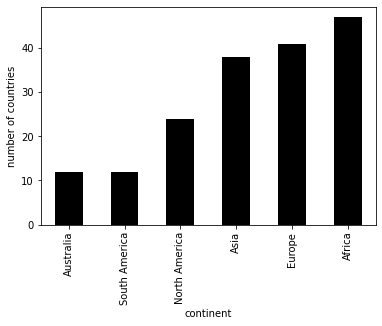

In [38]:
#Q17: How many countries are in each continent? (answer with a plot)
pl_qr("continent","number of countries",sort_contries)

In [39]:
#Q18: What is the total area of each continent?
total_area = select('''
SELECT continent, SUM(area) AS `total area`
FROM countries
GROUP BY continent
ORDER BY SUM(area) DESC
''')

total_area

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


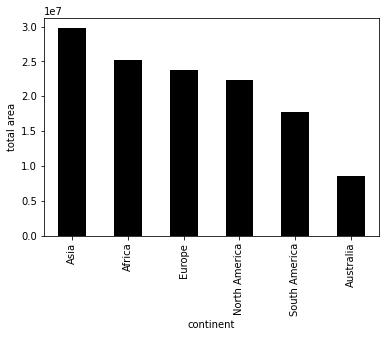

In [40]:
#Q19: What is the total area of each continent? (answer with a plot)
pl_qr("continent","total area",total_area)

In [41]:
#Q20: What is the area of each country in South America?
select('''
SELECT country, SUM(area) as `area`
FROM countries
WHERE continent = "South America"
GROUP BY country
ORDER BY SUM(area) DESC
''')

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [42]:
#Q21: What are the top 8 countries that have the largest real GDP?
GDP = select('''
SELECT country, population * "gdp-per-capita"/1000000000.0 AS `real GDP (billion)`
FROM countries
GROUP BY country
ORDER BY population * "gdp-per-capita" DESC
LIMIT 8
''')

GDP

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690


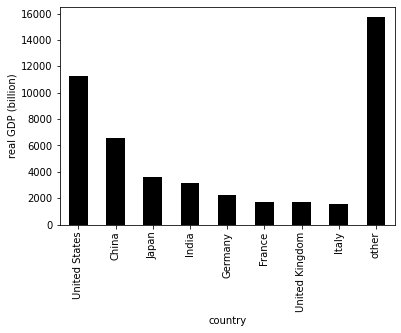

In [43]:
#Q22: What are the top 8 countries that have the largest real GDP? (answer with a plot)
others = qry('''
SELECT country, population * "gdp-per-capita"/1000000000.0 AS `real GDP (billion)`
FROM countries
GROUP BY country
ORDER BY population * "gdp-per-capita" DESC
''')[11:].sum()
others_GDP=["other", others.iloc[1]]
GDP.loc[8] = others_GDP
pl_qr('country','real GDP (billion)', GDP)

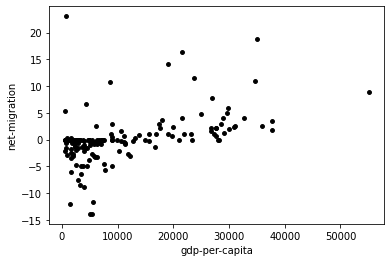

In [44]:
#Q23: What is the relationship between GDP per capita and net-migration?
def scatter(x,y,xlable,ylable):
    plt.scatter(x, y, s=15, c="k")
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show()
GDP_net_migration = select('''
SELECT "gdp-per-capita" , "net-migration"
FROM countries
GROUP BY country
ORDER BY "gdp-per-capita" , "net-migration"
''')

scatter(GDP_net_migration["gdp-per-capita"], GDP_net_migration["net-migration"],"gdp-per-capita" , "net-migration")

In [45]:
#Q24: What is the correlation between GDP per capita and net-migration?
GDP_net_migration.corr()['net-migration'].to_list()[0]
#r.corr(method = "pearson")["birth-rate"].to_list()[1]

0.45232113250112843

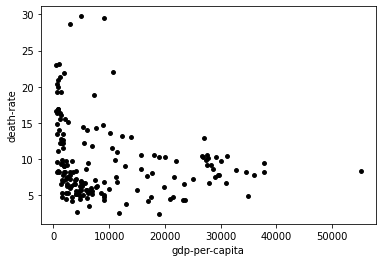

In [46]:
#Q25: What is the relationship between GDP per capita and death rates?:
GDP_death_rates = select('''
SELECT "gdp-per-capita" , "death-rate"
FROM countries
GROUP BY country
ORDER BY "gdp-per-capita" , "death-rates"
''')
scatter(GDP_death_rates["gdp-per-capita"], GDP_death_rates["death-rate"],"gdp-per-capita" , "death-rate")

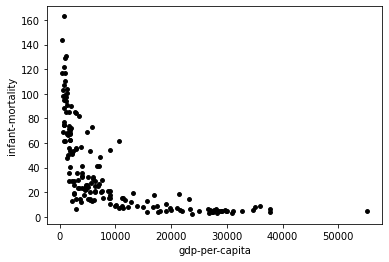

In [47]:
#Q26: What is the relationship between GDP per capita and infant-mortality?
GDP_infant_mortality = select('''
SELECT "gdp-per-capita" , "infant-mortality"
FROM countries
GROUP BY country
ORDER BY "gdp-per-capita" , "infant-mortality"
''')
scatter(GDP_infant_mortality["gdp-per-capita"], GDP_infant_mortality["infant-mortality"],"gdp-per-capita" , "infant-mortality")

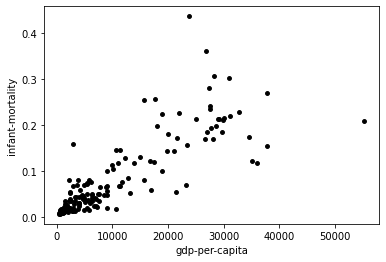

In [48]:
#Q27: What is the relationship between GDP per capita and inverse of infant-mortality?
GDP_inverse_infant_mortality = select('''
SELECT 1/"infant-mortality" AS `inverse` , "gdp-per-capita"
FROM countries
GROUP BY country
ORDER BY "gdp-per-capita" , "inverse"
''')
scatter(GDP_inverse_infant_mortality["gdp-per-capita"], GDP_inverse_infant_mortality["inverse"],"gdp-per-capita" , "infant-mortality")

In [49]:
#Q28: fit a y = m * x + n line to the scatter plot in question 27 using the least-squares method; what are the coefficients m and n?


df = pd.DataFrame({
    "gdp-per-capita": GDP_inverse_infant_mortality["gdp-per-capita"].to_list(),
    "inverse": GDP_inverse_infant_mortality["inverse"].to_list()
})
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept


df["fit"] = df["gdp-per-capita"] * m + n

tpl = (m,n)

tpl

(6.482983154848297e-06, 0.01323784909212086)

In [50]:
#Q29: When gdp-per-capita = 50000, what is the expected value for infant-mortality?
predict = lambda x:1/(m*x+n)
predict(50000)

2.963955279079342

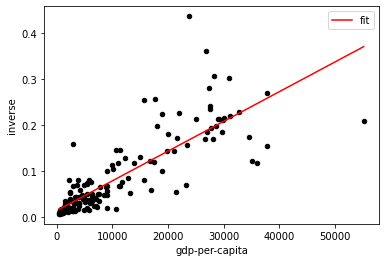

In [51]:
#Q30: plot the regression line to the scatter plot
ax = df.plot.scatter(x="gdp-per-capita", y="inverse", c="k")
df.plot.line(x="gdp-per-capita", y='fit', c='red', ax=ax)

In [52]:
conn.close()